# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# import
import pandas as pd

In [0]:
# What is the probability that a person is drunk
# after one positive breathalyzer test?

In [0]:
# define the conditions
p_drunk = 1/1000           #prior
p_non_drunk = 1 - p_drunk           # complement of the prior belief
p_pos_given_drunk = 1       # true positive
p_pos_given_non_drunk = .08     # false positive

In [12]:
# variables for first test
numerator = p_pos_given_drunk*p_drunk
marginal = (p_pos_given_drunk*p_drunk) + (p_pos_given_non_drunk*p_non_drunk)
posterior_probability = numerator/marginal
print(posterior_probability)


0.012357884330202669


In [13]:
# after two breathilizer test
p_drunk = posterior_probability
p_non_drunk = 1-p_drunk

# apply Bayes' theorem
numerator = p_pos_given_drunk*p_drunk
marginal = (p_pos_given_drunk*p_drunk) + (p_pos_given_non_drunk*p_non_drunk)
posterior_probability = numerator/marginal
print(posterior_probability)

0.13525210993291495


In [0]:
# convert to function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, number_of_tests):
  posterior_probability = prob_drunk_prior
  for test in range(0, number_of_tests):
    p_drunk = posterior_probability
    p_non_drunk = 1 - p_drunk
    p_pos_given_non_drunk = false_positive_rate
    posterior_probability = (p_pos_given_drunk*p_drunk)/ ((p_pos_given_drunk*p_drunk) + (p_pos_given_non_drunk*p_non_drunk))
  return posterior_probability

In [33]:
# try it out
prob_drunk_given_positive(1/1000, .08, 4)

0.9606895076105054

In [0]:
# how many tests will it take to be have probability greater than 95 percent
about 4 tests

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

In [0]:
# import libraries
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# read in data 
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")

In [46]:
# check df to see which feature to work on 
df.head() 

# going with hours per week

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


40.437455852092995

In [55]:
# using the frequentist approach
# calculate a 95% confidence interval on hours per week
conf_freq = stats.t.interval(0.95, 
                             df.shape[0],
                             loc = df['hours-per-week'].mean(),
                             scale = stats.sem(df['hours-per-week'])
                             )
conf_freq

(40.30333636181343, 40.57157534237256)

In [56]:
# using the bayesian approach 
conf_bayes = stats.bayes_mvs(df['hours-per-week'], alpha=.95)[0][1]
conf_bayes

(40.303343406780165, 40.571568297405825)

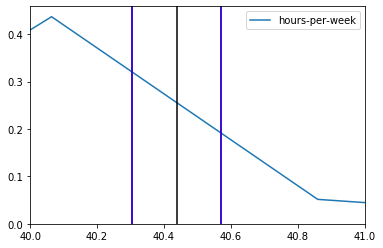

In [60]:
# graph both on a kernal density estimate
sns.kdeplot(df['hours-per-week'])
plt.xlim(40,41)
plt.axvline(x=conf_freq[0], color='red')
plt.axvline(x=conf_freq[1], color='red')
plt.axvline(x=conf_bayes[0], color='blue')
plt.axvline(x=conf_bayes[1], color='blue')
plt.axvline(x=df['hours-per-week'].mean(), color='k');

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).

## The frequentists approach to stats is limited to the sample as it's source of imputs to compujte statistics. The bayesian approach takes in data in any form that can be represented numerically (proportions etc). Another major difference is that the bayesian approach can generate realiable statistics from much smaller data sets. Whereas, the frequentist approach reliability is correlated with the size of the sample; ie, smaller sample size = less reliable inferences. 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!